In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('full_results.csv')

In [3]:
df.isnull().sum()

id               0
url              0
header           0
address          0
area             0
rooms            0
bathrooms        0
garages          0
amenities     1593
price            0
condo         1464
crawler          0
crawled_at       0
dtype: int64

In [4]:
all_columns = list(df.columns)
df[all_columns] = df[all_columns].astype(str)
df.describe()
###5184 unique id and 5184 unique url!#######

,id,url,header,address,area,rooms,bathrooms,garages,amenities,price,condo,crawler,crawled_at
count,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184
unique,5184,5184,477,1333,213,5,6,7,1050,522,752,1,48
top,2501729179,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 2 Quartos para Aluguel, 70m²","Canasvieiras, Florianópolis - SC",60,2 Quartos,1 Banheiro,1 Vaga,nan,R$ 1.500 /mês,nan,Florianópolis,2021-05-24 01:26
freq,1,1,212,206,267,2298,3045,3409,1593,243,1464,5184,144


In [5]:
df.index = df['id']
df = df.drop(['id'],axis=1)

df['price'] = df['price'].str.extract('R\$ (.*) /mês')
df['price'] = df['price'].replace('\.','',regex=True)

df['condo'] = df['condo'].str.extract('R\$ (.*)')
df['condo'] = df['condo'].replace('\.','',regex=True)
df['condo'] = df['condo'].fillna(0)

df['garages'] = df['garages'].str.extract('(.*) Vaga')
df['bathrooms'] = df['bathrooms'].str.extract('(.*) Banheiro')
df['rooms'] = df['rooms'].str.extract('(.*) Quarto')

df['neighborhood'] = df.address.str.split('\s-').str[1]
df['neighborhood'] = df.neighborhood.str.split(',').str[0]

In [6]:
df['neighborhood'].unique()

array([' Balneario do Estreito', ' Córrego Grande', ' Pantanal',
       ' Rio Tavares', ' Jurerê Internacional', ' Itacorubi', ' Jurerê',
       ' Carvoeira', ' Cachoeira do Bom Jesus', ' Estreito', ' Centro',
       ' SC', ' Trindade', ' Santinho', ' Beira Mar', ' Agronômica',
       ' Ingleses do Rio Vermelho', ' Canasvieiras', ' Coqueiros',
       ' Ponta das Canas', ' Praia dos Ingleses', ' Campeche',
       ' Joao Paulo', ' Réis', ' Jardim Atlântico', ' Saco dos Limões',
       ' Lagoa da Conceição', ' Capoeiras', ' Monte Verde', ' Abraão',
       ' Praia Brava', ' Barra da Lagoa', ' Santa Mônica',
       ' Ribeirão da Ilha', ' Balneário', ' José Mendes', ' Saco Grande',
       ' São João do Rio Vermelho', ' Armação', ' Costeira do Pirajubaé',
       ' Itaguaçu', ' Ingleses Norte', ' Carianos',
       ' Armação do Pântano do Sul', ' Bom Abrigo', ' Açores',
       ' Monte Cristo', ' Santo Antônio de Lisboa', ' Vargem Grande',
       ' Barreiros', ' Canto', ' Morro das Pedras', ' Ca

In [7]:
df.isnull().sum()

url               0
header            0
address           0
area              0
rooms             0
bathrooms         0
garages           0
amenities         0
price           957
condo             0
crawler           0
crawled_at        0
neighborhood      0
dtype: int64

In [8]:
cols = df.columns.drop(['crawled_at','crawler','header','address','neighborhood','url','amenities'])
cols

Index(['area', 'rooms', 'bathrooms', 'garages', 'price', 'condo'], dtype='object')

In [9]:
df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce')
max(df.price)

30000.0

In [10]:
df.isnull().sum()

url                0
header             0
address            0
area               0
rooms              0
bathrooms          0
garages         1018
amenities          0
price            957
condo              0
crawler            0
crawled_at         0
neighborhood       0
dtype: int64

In [11]:
df = df.dropna(subset=['price'])
df = df.fillna(0)

In [12]:
df.isnull().sum()

url             0
header          0
address         0
area            0
rooms           0
bathrooms       0
garages         0
amenities       0
price           0
condo           0
crawler         0
crawled_at      0
neighborhood    0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

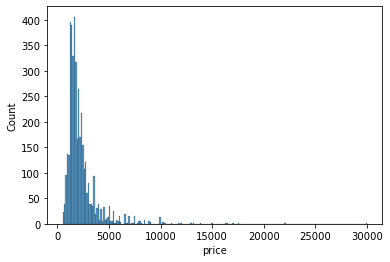

In [13]:
sns.histplot(data=df['price'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4227 entries, 2520673504 to 2514496364
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           4227 non-null   object 
 1   header        4227 non-null   object 
 2   address       4227 non-null   object 
 3   area          4227 non-null   int64  
 4   rooms         4227 non-null   int64  
 5   bathrooms     4227 non-null   int64  
 6   garages       4227 non-null   float64
 7   amenities     4227 non-null   object 
 8   price         4227 non-null   float64
 9   condo         4227 non-null   int64  
 10  crawler       4227 non-null   object 
 11  crawled_at    4227 non-null   object 
 12  neighborhood  4227 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 462.3+ KB


In [15]:
df.describe()

,area,rooms,bathrooms,garages,price,condo
count,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4.227000e+03
mean,73.711379,2.014904,1.572510,1.061273,2242.546487,8.162411e+02
std,52.475239,0.783475,0.817828,6.287126,1639.472303,1.924990e+04
min,10.000000,1.000000,1.000000,0.000000,500.000000,0.000000e+00
25%,50.000000,1.000000,1.000000,1.000000,1400.000000,2.870000e+02
50%,66.000000,2.000000,1.000000,1.000000,1800.000000,4.500000e+02
75%,84.000000,3.000000,2.000000,1.000000,2500.000000,6.350000e+02
max,2300.000000,5.000000,6.000000,407.000000,30000.000000,1.250000e+06


In [16]:
df = df.drop(['crawled_at','crawler','header','url'], axis=1)
df.head()

,address,area,rooms,bathrooms,garages,amenities,price,condo,neighborhood
id,,,,,,,,,
2520673504,"Rua Coronel Pedro Demoro, 1507 - Balneario do ...",75,2,2,1.0,Elevador\nPiscina\nChurrasqueira\nSalão de fes...,2800.0,0,Balneario do Estreito
2512632181,"Rua Maestro Aldo Krieger, 54 - Córrego Grande,...",65,2,2,1.0,Elevador\nSalão de festas\nAr-condicionado\nCo...,1700.0,740,Córrego Grande
2517219101,"Rua Maria Eduarda, 33 - Pantanal, Florianópoli...",35,1,1,0.0,Mobiliado\nElevador\nAr-condicionado\nCondomín...,1400.0,300,Pantanal
2518663689,"Servidão Manoel Isidoro Augusto, 560 - Rio Tav...",70,1,1,1.0,Jardim\nSistema de alarme\nCozinha americana,1900.0,0,Rio Tavares
2516104017,"Avenida dos Búzios, 3147 - Jurerê Internaciona...",250,4,3,2.0,Mobiliado\nElevador\nChurrasqueira\nSalão de f...,5200.0,1200,Jurerê Internacional
